In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

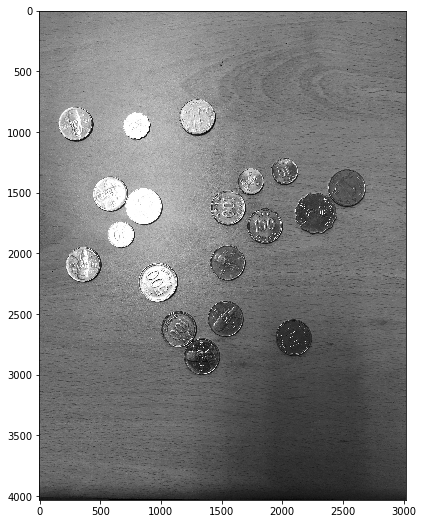

In [65]:
image = 'coins_set3.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

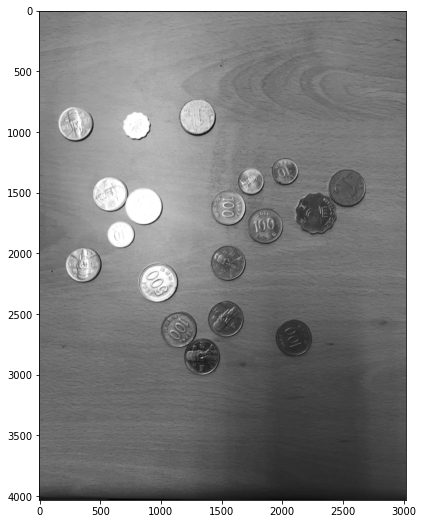

In [66]:
img =  cv2.GaussianBlur(img, (15,19), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

In [67]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 120, param1 = 50, param2 = 30, minRadius = 50, maxRadius = 280)
all_circs_rounded = np.uint16(np.around(all_circs))

print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')

[[[ 980 2242  159]
  [ 298  934  137]
  [ 358 2094  137]
  [ 860 1614  148]
  [1562 1628  146]
  [ 678 1846  112]
  [1556 2078  138]
  [1866 1770  128]
  [1538 2546  148]
  [2032 1322  108]
  [ 584 1512  139]
  [1744 1406   95]
  [1150 2630  151]
  [1306  880  142]
  [1336 2856  147]
  [2534 1464  151]
  [2274 1692  151]
  [2088 2672   62]
  [1742 1784  110]
  [ 906 2142   78]
  [1032 2352   70]
  [2030 1754  142]
  [1872 1402   79]
  [1504 2426   70]]]
(1, 24, 3)
I have found 24 coins.


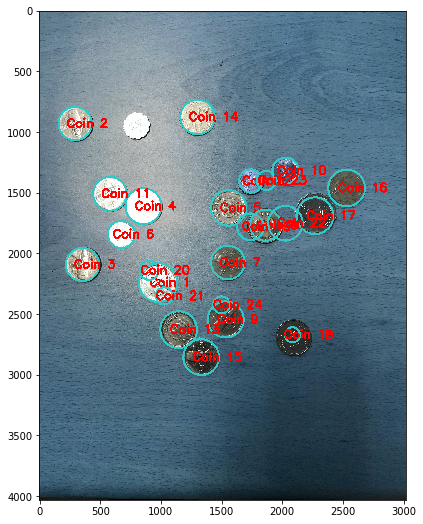

In [68]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),i[2],(50, 200, 200), 15)
    cv2.circle(img_orig, (i[0],i[1]),2,(255, 0, 0), 5)
    cv2.putText(img_orig, "Coin " + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (255,0,0), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(img_orig)